# Analyst Sale Data

--------------------------------------------------------


## *------1. Prepare and store data------*

In [100]:
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
import pandas as pd  
import os 
import plotly.express as px
# import plotly.graph_objects as go 

In [101]:
path='E:\My_Plan\DataAnalyst\Project\DA_saledata\Sales_Data'.replace('\\','/')
df=pd.DataFrame()
for files in os.listdir(path):
    read_files=pd.read_csv(path+'/'+files)
    df=pd.concat([df,read_files])
df.to_csv(path+'/all_data.csv',index=False)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


---------------------------------

## *------2. Processing and visualize data------*

In [102]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [103]:
df=df.dropna()

In [104]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

` Take month in Datetime `

In [105]:
df['month']= df['Order Date'].str.split('/').str[0]
#can using pd.to_datetime().dt.month but it takes enomous time to excute (maybe over 2 mins)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


` Oops, Having problem when seeing wrong value in column. That's "Order Date" value in "month" field `

In [106]:
df['month'].unique()


array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [107]:
df[df['month']=='Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


` Drop wrong data `

In [108]:
df=df[df['Order Date']!='Order Date']
df['month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

` Change type of some fields `

In [109]:
df['month']=df['month'].astype('int')
df['Quantity Ordered']=df['Quantity Ordered'].astype('int')
df['Price Each']=df['Price Each'].astype('float')
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

` Calculate sale values and group by `

In [110]:
df['sales']=df['Price Each']*df['Quantity Ordered']

In [111]:
data_sales_sum=df.groupby('month')['sales'].sum()
data_sales_mean=df.groupby('month')['sales'].mean()


` Visualization `

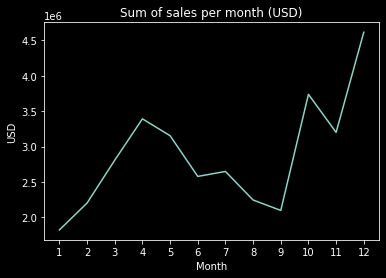

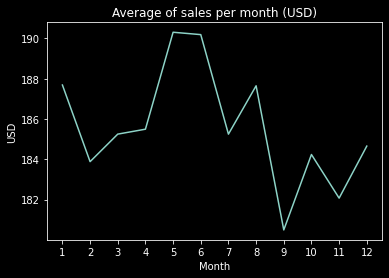

In [112]:
month_list=sorted(df['month'].unique().tolist())
plt.plot(data_sales_sum,label='Sum of Sales')
plt.title('Sum of sales per month (USD)')
plt.xticks(month_list)
plt.xlabel('Month')
plt.ylabel('USD')
plt.show()
plt.plot(data_sales_mean,label='Mean of Sales')
plt.title('Average of sales per month (USD)')
plt.xticks(month_list)
plt.xlabel('Month')
plt.ylabel('USD')
plt.show()

In [113]:
df['city']=df['Purchase Address'].str.split(',').str[-2]
list_city=list(df['city'].unique())
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


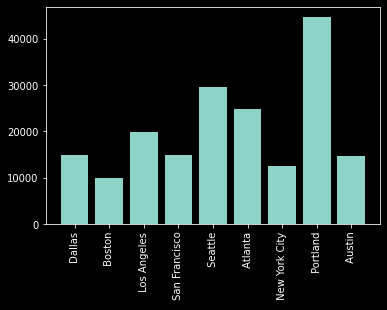

In [114]:
count_order_city=df.groupby('city')['Order ID'].count()
plt.bar(list_city,count_order_city)
plt.xticks(rotation=90)
plt.show()

## *------2. Processing and analyzing number of products per hours following city------*
* Answer the question: The best place and moment to sell a specific item ( where and when)
* Answer the question: Number of products is sold by per Hour

` Take time and Hour tp prepare for processing `

In [115]:
time=[]
for i in list(df['Order Date'].str.split('/')):
    time.append(i[2].split(' ')[1])

In [116]:
Hour=[]
for i in time:
    Hour.append(int(i.split(':')[0]))


In [117]:
df['Hour']=Hour

` Group by 2 factors ' Hour' and ' Product' to execute the main purpose `

In [118]:
No_product_by_hour=df.groupby(['Hour','Product'])['Order ID'].count()
No_product_by_hour

Hour  Product               
0     20in Monitor               86
      27in 4K Gaming Monitor    112
      27in FHD Monitor          182
      34in Ultrawide Monitor    152
      AA Batteries (4-pack)     402
                               ... 
23    ThinkPad Laptop           181
      USB-C Charging Cable      708
      Vareebadd Phone            59
      Wired Headphones          664
      iPhone                    220
Name: Order ID, Length: 456, dtype: int64

In [119]:
No_product_by_hour01=No_product_by_hour.unstack() 
fig=px.line(No_product_by_hour01)
fig.update_xaxes(nticks=30)
fig.update_layout(xaxis_title='Hour',yaxis_title='No of products',title='NUMBER OF PRODUCTS ARE SOLD PER HOUR')


` Analyzing sum of sale base on city and products `
* Answer the question: the place is suitable for sell a specific item or the place having a trend of items 
* Answer the question: revenue per places and products

In [183]:
SumSale_product_by_city=df.groupby(['city','Product'])['sales'].sum()
SumSale_product_by_city=SumSale_product_by_city.unstack()
SumSale_product_by_city.head()

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
city,,,,,,,,,,,,,,,,,,,
Atlanta,37616.58,192265.07,88194.12,183155.18,8421.12,7053.41,189900.0,108389.16,122100.0,270600.0,35400.0,31200.0,28091.05,644300.0,356996.43,22884.25,69200.0,18932.21,380800.0
Austin,25297.70,124016.82,53996.40,124636.72,5468.16,4987.32,133050.0,70692.93,72600.0,164400.0,33000.0,15600.0,19539.65,426700.0,209997.90,14949.45,43200.0,13548.70,263900.0
Boston,43336.06,263243.25,119542.03,254973.29,11581.44,10348.39,247950.0,141585.84,166200.0,355800.0,35400.0,43200.0,37240.45,814300.0,446995.53,30603.95,85600.0,26641.78,527100.0
Dallas,37726.57,187585.19,88044.13,194554.88,8682.24,7486.96,179100.0,106289.37,126000.0,276600.0,26400.0,30600.0,27866.80,649400.0,344996.55,22131.40,71200.0,20011.31,363300.0
Los Angeles,72373.42,391159.97,183437.77,362890.45,17041.92,14851.33,370950.0,212478.75,218100.0,508800.0,69600.0,63000.0,56391.40,1276700.0,640993.59,45194.90,126800.0,39207.30,782600.0


In [184]:
fig=px.bar(SumSale_product_by_city)
# fig.update_xaxes(nticks=[])
fig.update_layout(xaxis_title='City',yaxis_title='USD',title='TOTAL SALES')
fig.show()

## *------3. Buy together------*

` Create dataframe which contains all duplicate Order ID `

In [185]:
df1=df[df['Order ID'].duplicated(keep=False)==True]
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11


` Join all duplicate into 1 cell and seperated by comma `

In [186]:
df1['Groupped Product']=df1.groupby('Order ID')['Product'].transform(lambda x: (',').join(x))
df1.head()

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Groupped Product
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


` We have more than 2 duplicate values so drop and take 1 value `

In [187]:
df1=df1.drop_duplicates(subset='Order ID')
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Groupped Product
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"


` Taking top 5 products buying together `

In [188]:
Group_pro=df1['Groupped Product'].value_counts()[0:5].to_frame()
Group_pro.reset_index(inplace=True) #convert index ( name Groupped Product) to nomal column
Group_pro

,index,Groupped Product
0,"iPhone,Lightning Charging Cable",882
1,"Google Phone,USB-C Charging Cable",856
2,"iPhone,Wired Headphones",361
3,"Vareebadd Phone,USB-C Charging Cable",312
4,"Google Phone,Wired Headphones",303


In [189]:
fig=px.pie(Group_pro,values=list(Group_pro['Groupped Product']),names=list(Group_pro['index']),title='PERCENTAGE OF ITEMS BUYING TOGETHER')
# fig.update_xaxes(nticks=[])
# fig.update_layout(xaxis_title='City',yaxis_title='USD',title='TOTAL SALES')
fig.show()